In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import tkinter as tk
from PIL import Image, ImageTk
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
G = nx.DiGraph()
G.add_nodes_from( ['Acapulco','Puebla','CDMX','Morelia','Uruapan','San Luis Potosi','Tampico','Piedras Negras','Culiacan','Abraham Gonzalez','Nogales','Guaymas','Loreto','Manuel Marquez de Leon','Los Cabos'] )
G.add_edges_from([
('Cozumel', 'Tampico', {'weight': 17}),
('Ciudad del Carmen', 'Cozumel', {'weight': 15}),
('Angel Albino Corzo', 'Ciudad del Carmen', {'weight': 11}),
('Angel Albino Corzo', 'Minatitlan', {'weight': 15}),
('Angel Albino Corzo', 'Acapulco', {'weight': 1}),
('Minatitlan', 'Ciudad del Carmen', {'weight': 16}),
('Minatitlan', 'Veracruz', {'weight': 18}),
('Acapulco', 'Morelia', {'weight': 14}),
('Acapulco', 'Uruapan', {'weight': 14}),
('Puebla', 'Veracruz', {'weight': 12}),
('Puebla', 'Acapulco', {'weight': 19}),
('CDMX', 'Acapulco', {'weight': 4}),
('Morelia', 'CDMX', {'weight': 15}),
('Morelia', 'San Luis Potosi', {'weight': 11}),
('Uruapan', 'Culiacan', {'weight': 15}),
('San Luis Potosi', 'Abraham Gonzalez', {'weight': 15}),
('Tampico', 'Puebla', {'weight': 7}),
('Tampico', 'CDMX', {'weight': 8}),
('Tampico', 'San Luis Potosi', {'weight': 11}),
('Piedras Negras', 'San Luis Potosi', {'weight': 11}),
('Piedras Negras', 'Tampico', {'weight': 16}),
('Culiacan', 'Piedras Negras', {'weight': 8}),
('Culiacan', 'Guaymas', {'weight': 16}),
('Abraham Gonzalez', 'Piedras Negras', {'weight': 15}),
('Nogales', 'Abraham Gonzalez', {'weight': 6}),
('Guaymas', 'Abraham Gonzalez', {'weight': 18}),
('Guaymas', 'Nogales', {'weight': 5}),
('Guaymas', 'Loreto', {'weight': 13}),
('Loreto', 'Manuel Marquez de Leon', {'weight': 15}),
('Manuel Marquez de Leon', 'Culiacan', {'weight': 14}),
('Manuel Marquez de Leon', 'Los Cabos', {'weight': 10}),
])

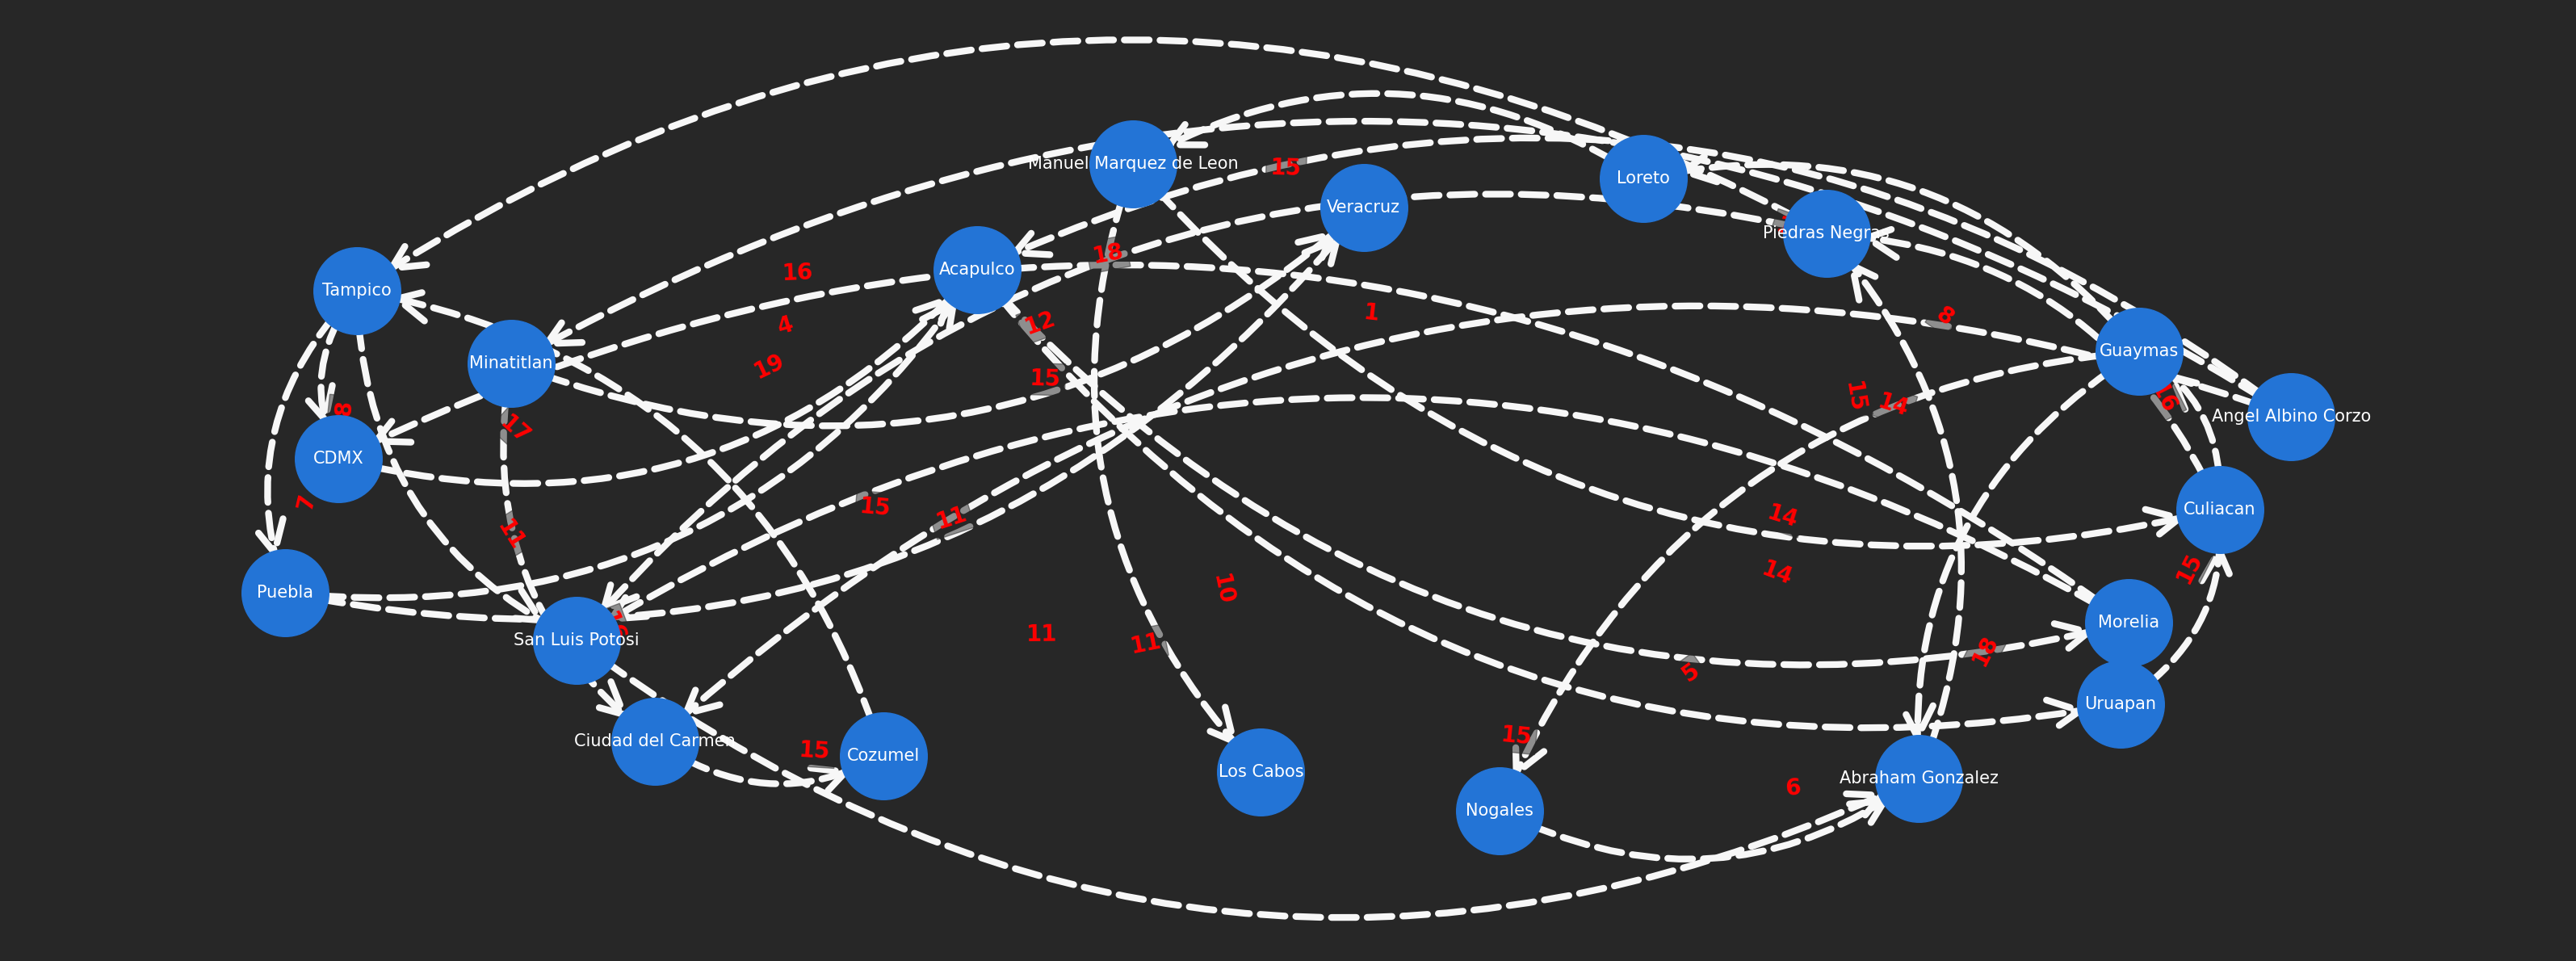

In [10]:
#Hacer imagen del grafo
# se define el ancho y alto de la figura/gráfica/imagen y el color de fondo de la imagen (en este caso sin color de fondo)
plt.figure(3,figsize=(32,12), facecolor='#272727', edgecolor='#272727', clear=True)
#poner el fondo de la imagen en #272727
plt.gca().set_facecolor('#272727')

# nodes
pos = nx.spring_layout(G, seed=732128, k=5) # semilla para generar el layout, la k es la distancia entre nodos
# Para que no se toquen los nodos

nx.draw_networkx_nodes(G, pos, node_color = '#2374D6', node_size = 6000)
nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif", font_color='white')

nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=6, alpha=1, edge_color="#F7F7F7", style="dashed", arrowsize=70, arrowstyle="->", connectionstyle="arc3,rad=0.3", min_source_margin=30, min_target_margin=30)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=20,font_color='red', font_family="sans-serif", font_weight="bold", label_pos=0.3, rotate=True, bbox=dict(facecolor="#272727", alpha=0.5, edgecolor="#272727"))
# guardar imagen en formato png del grafo

# ploting
ax = plt.gca()
ax.margins(0.08)

plt.axis("off")
plt.tight_layout()
plt.savefig("graph.png", format="PNG", facecolor='#272727', edgecolor='#272727')
plt.show()


In [11]:
img_grafo = cv.imread('graph.png')
#corregir el color de la imagen
img_grafo = cv.cvtColor(img_grafo, cv.COLOR_BGR2RGB)
#redimensionar la imagen sin alterar la proporcion
img_grafo = cv.resize(img_grafo, (800, 400))

In [17]:
# Depth Limited Search

def DepthLimitedSearch(G, Start, Target, Limit):
    if Start == Target:
        return [Start]
    if Limit == 0:
        return []
    if Limit > 0:
        for neighbor in G.neighbors(Start):
            path = DepthLimitedSearch(G, neighbor, Target, Limit-1)
            if path:
                return [Start] + path
    return []
    

# Iterative Deepening Search

def IterativeDeepeningSearch(G, Start, Target, MaxDepth): #MaxDepth es la profundidad máxima 
    for depth in range(MaxDepth):   # range(MaxDepth) genera una lista de valores de 0 a MaxDepth-1 
        path = DepthLimitedSearch(G, Start, Target, depth)
        if path:
            path =  " → ".join(path)          # Convierte la lista en un string separado por " -> "
            path += f"   Iteraciones: {depth}" # Agrega el número de iteraciones
            return path
    return "No se encontró una ruta"

In [18]:
print(IterativeDeepeningSearch(G, 'Acapulco', 'Los Cabos', 10))

Acapulco → Uruapan → Culiacan → Guaymas → Loreto → Manuel Marquez de Leon → Los Cabos   Iteraciones: 6


In [14]:
# Funciones

def buscar_ruta():
    start = entry_start.get()
    target = entry_target.get()
    limit = entry_limit.get()
    #validar start y target para que esten en formato Title
    if start.upper() in G.nodes:    # Validar para CDMX, cdmx, Cdmx, CDmx, etc.
        start = start.upper()
    else:
        start = start.title()
    if target.upper() in G.nodes:
        target = target.upper()
    else:
        target = target.title()
    #validar limit para que sea un entero
    try:
        limit = int(limit)
    except:
        limit = 0
    if limit < 0:
        limit = 0
    ruta = IterativeDeepeningSearch(G, start, target, limit)
    label_ruta.config(text=ruta)
    label_ruta.pack()
    return ruta

# Ventana principal
window = tk.Tk()
window.title("Ventana Principal")
window.configure(bg="#272727")
window.geometry("1920x1080")

title = tk.Label(window, text="DIJKSTRA SEARCH", font=("Impact", 60), bg="#272727", fg="#F7F7F7")
title.pack()

# Label Para mostrar el grafo
label_graf = tk.Label(window, bg="#272727")
label_graf.pack()
#convertir la imagen a un formato compatible con tkinter
img_grafo = Image.fromarray(img_grafo)
img_grafo = ImageTk.PhotoImage(img_grafo)
label_graf.config(image=img_grafo)

#Hacer el frame para las cajas de texto

frameinput = tk.Frame(window, bg="#272727")
frameinput.pack(pady=20)


# Cajas de texto para ingresar el nodo inicial y final (strart, target) 
label_start = tk.Label(frameinput, text="Nodo Inicial", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7")
label_start.pack()
entry_start = tk.Entry(frameinput, font=("Cooper Std Black", 15), bg="#EAE4DA", fg="#34495E")
entry_start.pack()
entry_start.focus() # Pone el cursor en la caja de texto
entry_start.bind("<Return>", lambda e: entry_target.focus()) # Al presionar "Enter" pasa al siguiente entry
entry_start.bind("<Tab>", lambda e: entry_target.focus()) # Al presionar "Tab" pasa al siguiente entry

label_target = tk.Label(frameinput, text="Nodo Final", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7")
label_target.pack()
entry_target = tk.Entry(frameinput, font=("Cooper Std Black", 15), bg="#EAE4DA", fg="#34495E")
entry_target.pack()
entry_target.focus() 
entry_target.bind("<Return>", lambda e: entry_limit.focus()) # Al presionar "Enter" ejecuta la función "buscar_ruta"
entry_target.bind("<Tab>", lambda e: entry_limit.focus()) # Al presionar "Tab" ejecuta la función "buscar_ruta"

label_limit = tk.Label(frameinput, text="Límite de Profundidad", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7")
label_limit.pack()
entry_limit = tk.Entry(frameinput, font=("Cooper Std Black", 15), bg="#EAE4DA", fg="#34495E")
entry_limit.pack()
entry_limit.bind("<Return>", lambda e: buscar_ruta()) # Al presionar "Enter" ejecuta la función "buscar_ruta"
entry_limit.bind("<Tab>", lambda e: buscar_ruta()) # Al presionar "Tab" ejecuta la función "buscar_ruta")


# Crea un botón de "BUSCAR RUTA" que al hacer clic, se ejecute la función "buscar_ruta"
button_buscar_ruta = tk.Button(window, text=" BUSCAR RUTA ", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7", command=buscar_ruta, width=30, height=1)
button_buscar_ruta.pack()

# Label que muestra la ruta encontrada, se mantiene oculta hasta que se presione el botón "BUSCAR RUTA"
frameRuta = tk.Frame(window, bg="#272727")
frameRuta.pack(pady=20)
label_ruta = tk.Label(frameRuta, text="", font=("Cooper Std Black", 15), bg="#272727", fg="#F7F7F7")
label_ruta.pack_forget()


window.mainloop()